Data Management For Data Science Final Project

Load Pandas, NumPy, sklearn.metrics, prophet, the dataset and drop NA.

In [206]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt

CB2023 = pd.read_csv(r"C:\Users\Peasa\CitiBike2023_Combined_Sampled.csv", low_memory=False)
CB2023_clean = CB2023.replace(r'^\s*$', np.nan, regex=True).dropna()
print("Clean Shape:", CB2023_clean.shape) 


Clean Shape: (498737, 13)


Exploratory Data Analysis, Part 1: Time-Based Trends

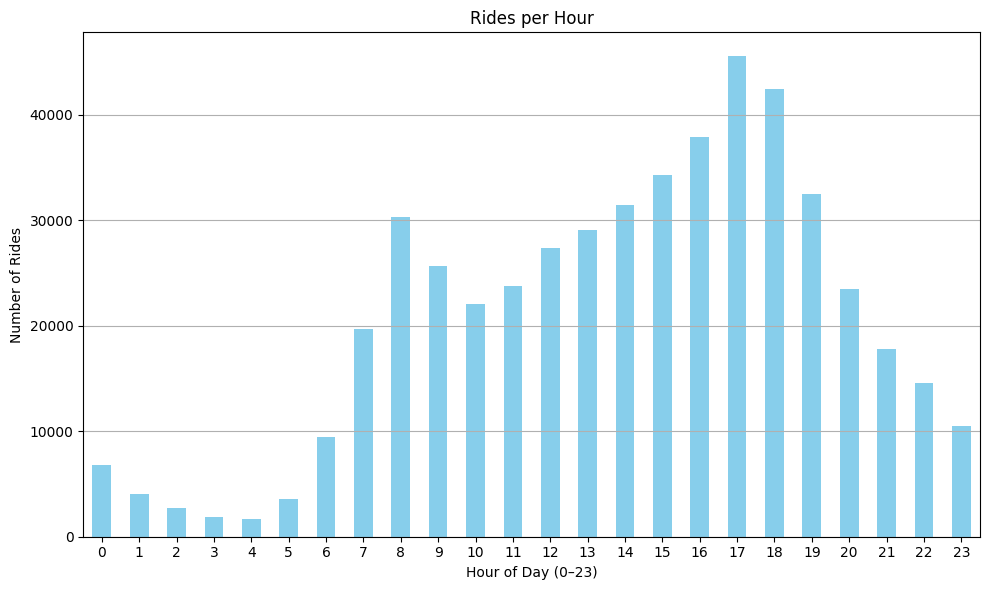

In [207]:
#Convert to date/time and extract time features
CB2023_clean["started_at"] = pd.to_datetime(CB2023_clean["started_at"])
CB2023_clean["hour"] = CB2023_clean["started_at"].dt.hour
CB2023_clean["dayofweek"] = CB2023_clean["started_at"].dt.day_name()
CB2023_clean["month"] = CB2023_clean["started_at"].dt.month_name()

#Bar Graph of Rides Per Hour
rides_per_hour = CB2023_clean["hour"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rides_per_hour.plot(kind="bar", color="skyblue")
plt.title("Rides per Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

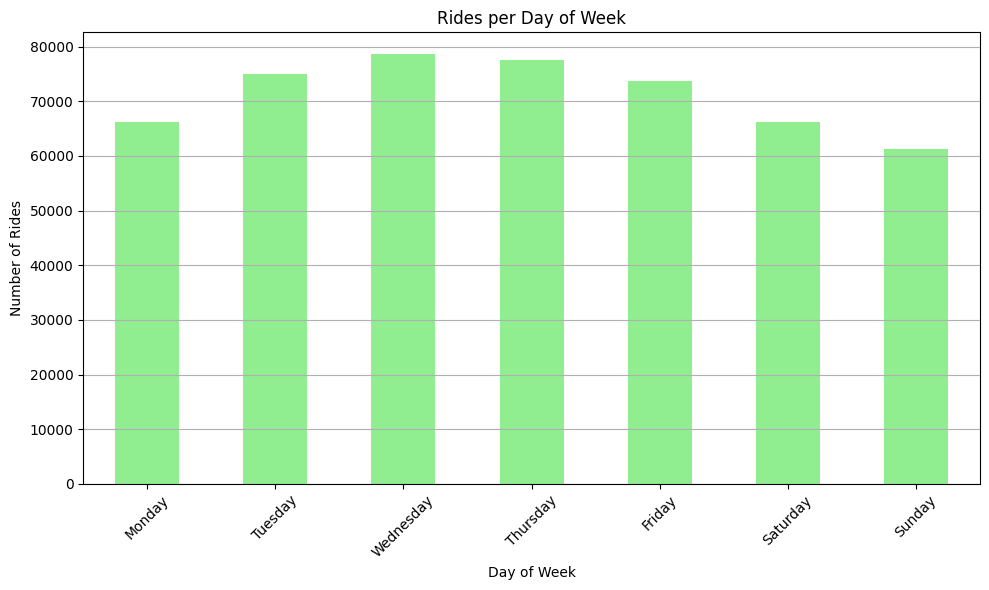

In [208]:
#Bar Graph of Rides per Day of Week:
rides_per_day = CB2023_clean["dayofweek"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(10, 6))
rides_per_day.plot(kind="bar", color="lightgreen")
plt.title("Rides per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

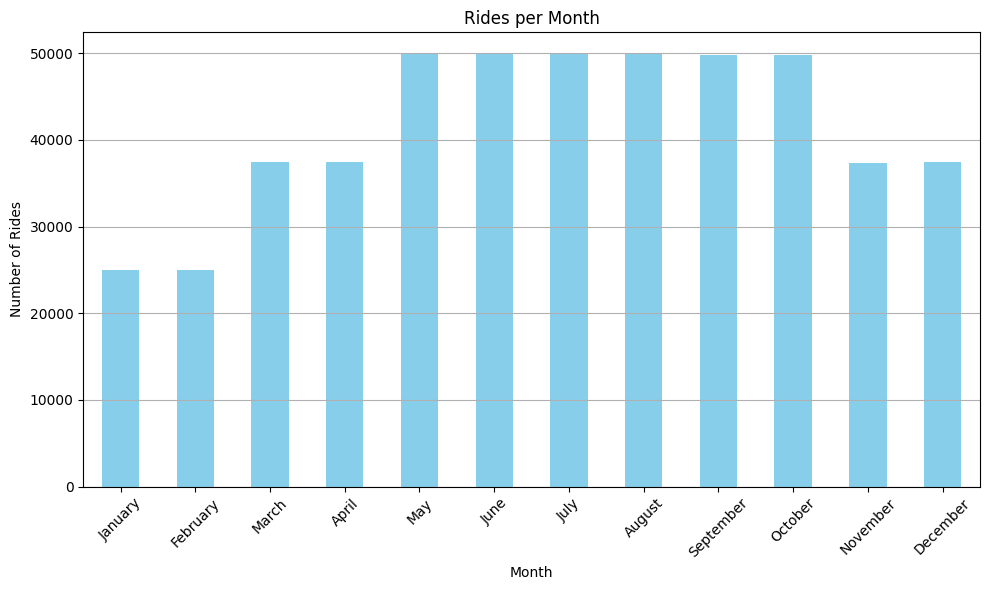

In [209]:
#Bar Graph of Rides per Month:
rides_per_month = CB2023_clean["month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

plt.figure(figsize=(10, 6))
rides_per_month.plot(kind="bar", color="skyblue")
plt.title("Rides per Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Exploratory Data Analysis, Part 2: Station Trends

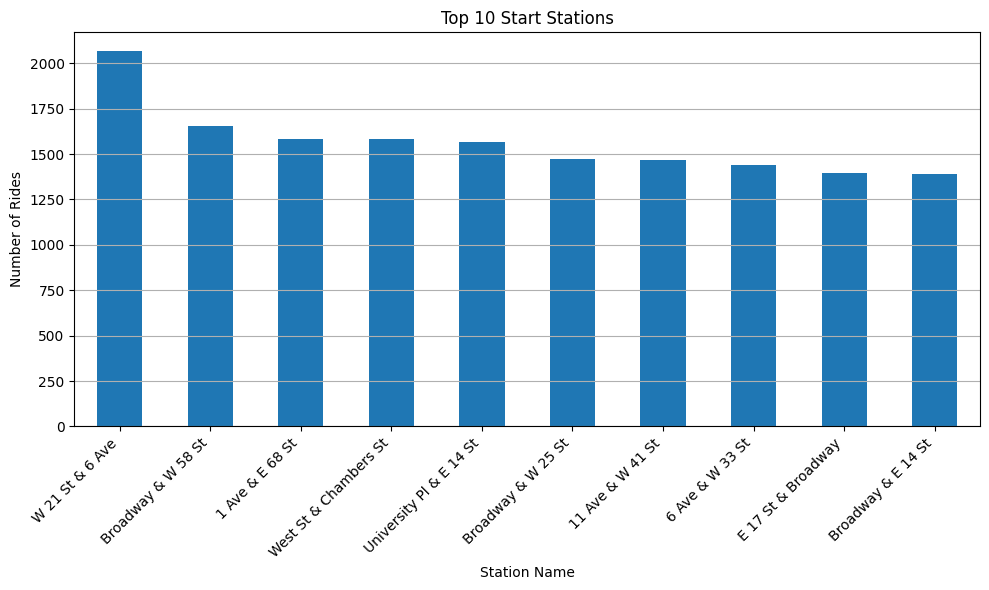

In [210]:
#Bar Graph of Top 10 Start Stations
top_stations = CB2023_clean["start_station_name"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_stations.plot(kind='bar')
plt.title("Top 10 Start Stations")
plt.xlabel("Station Name")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


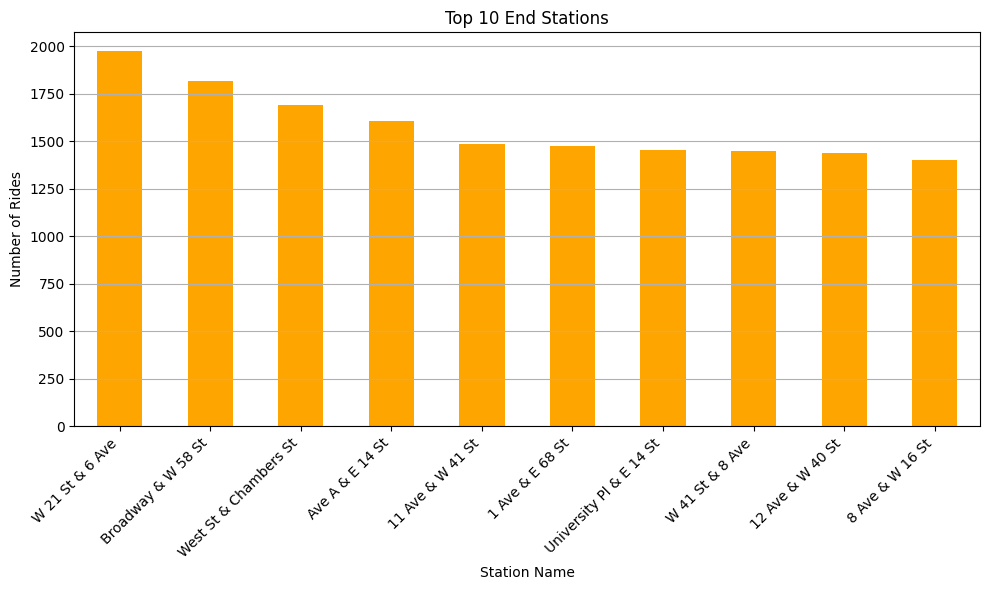

In [211]:
#Bar Graph of Top 10 End Stations
top_end_stations = CB2023_clean["end_station_name"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_end_stations.plot(kind='bar', color='orange')
plt.title("Top 10 End Stations")
plt.xlabel("Station Name")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [212]:
#Station Flows
start_counts = CB2023_clean["start_station_name"].value_counts()
end_counts = CB2023_clean["end_station_name"].value_counts()

station_flow = pd.DataFrame({
    "starts": start_counts,
    "ends": end_counts
}).fillna(0)

station_flow["net_outflow"] = station_flow["starts"] - station_flow["ends"]

#Stations with the highest net outflow
print("Stations with Highest Net Outflow:")
print(station_flow.sort_values("net_outflow", ascending=False).head(10))


Stations with Highest Net Outflow:
                               starts    ends  net_outflow
Broadway & W 56 St              925.0   667.0        258.0
St Marks Pl & 1 Ave             784.0   627.0        157.0
6 Ave & W 34 St                1206.0  1052.0        154.0
Broadway & W 25 St             1474.0  1321.0        153.0
Allen St & Rivington St         889.0   742.0        147.0
W 18 St & 6 Ave                 929.0   793.0        136.0
11 Ave & W 27 St               1014.0   879.0        135.0
W 44 St & 5 Ave                 779.0   654.0        125.0
E 17 St & Broadway             1393.0  1270.0        123.0
North Moore St & Greenwich St  1062.0   941.0        121.0


In [213]:
#Stations with Highest Net Inflow
print("Stations with Highest Net Inflow:")
print(station_flow.sort_values("net_outflow", ascending=True).head(10))


Stations with Highest Net Inflow:
                                starts    ends  net_outflow
Ave A & E 14 St                 1338.0  1608.0       -270.0
Lafayette St & E 8 St           1023.0  1275.0       -252.0
12 Ave & W 40 St                1252.0  1438.0       -186.0
West St & Liberty St            1214.0  1399.0       -185.0
W 4 St & 7 Ave S                 748.0   931.0       -183.0
Metropolitan Ave & Bedford Ave   889.0  1071.0       -182.0
Canal St & Rutgers St           1071.0  1251.0       -180.0
Broadway & W 58 St              1654.0  1816.0       -162.0
W 67 St & Broadway               901.0  1056.0       -155.0
Central Park West & W 68 St      979.0  1133.0       -154.0


Exploratory Data Analysis, Part Three: Trip Durations

Trip Duration Summary (in seconds):
count    498737.000000
mean        829.934335
std        1669.394039
min       -3164.550000
25%         319.180000
50%         558.876000
75%         984.641000
max      239172.308000
Name: trip_duration_sec, dtype: float64


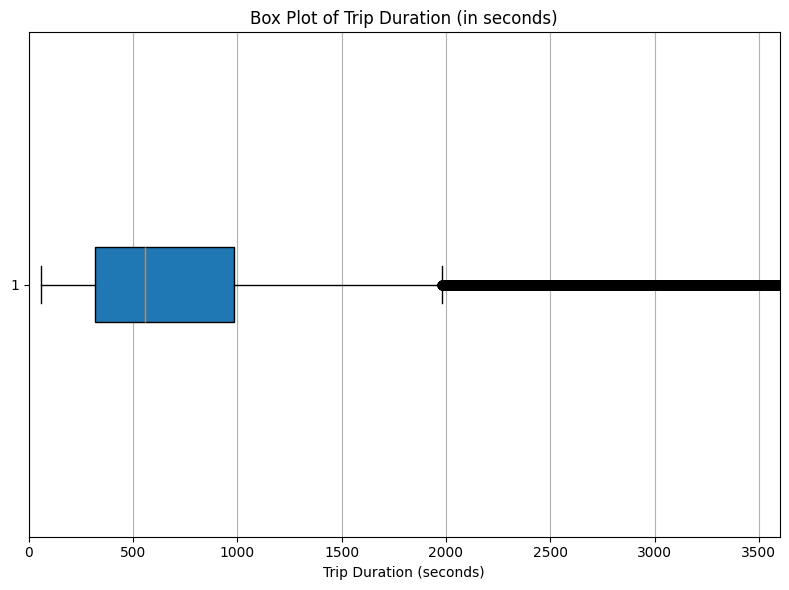

In [214]:
CB2023_clean["ended_at"] = pd.to_datetime(CB2023_clean["ended_at"])
CB2023_clean["trip_duration_sec"] = (CB2023_clean["ended_at"] - CB2023_clean["started_at"]).dt.total_seconds()
#Trip Duration Summary:
print("Trip Duration Summary (in seconds):")
print(CB2023_clean["trip_duration_sec"].describe())

#Boxplot of Trip Duration (Excluding Extreme Outliers):
plt.figure(figsize=(8, 6))
plt.boxplot(CB2023_clean["trip_duration_sec"], vert=False, patch_artist=True)
plt.title("Box Plot of Trip Duration (in seconds)")
plt.xlabel("Trip Duration (seconds)")
plt.xlim(0, 3600)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Prototype Prophet Model to Forecast Demand:

In [215]:
#Get hourly aggregates for one station to get an idea of demand over time:
CB2023_clean["hourly"] = CB2023_clean["started_at"].dt.floor("h")

#Choosing a popular station
station = "W 21 St & 6 Ave"
station_data = CB2023_clean[CB2023_clean["start_station_name"] == station]

#Group by time
hourly_demand = station_data.groupby("hourly").size().reset_index(name="rides")
hourly_demand.columns = ["ds", "y"] 

print(hourly_demand.head())

                   ds  y
0 2023-01-01 14:00:00  1
1 2023-01-01 23:00:00  1
2 2023-01-02 08:00:00  1
3 2023-01-02 09:00:00  1
4 2023-01-02 16:00:00  1


03:29:31 - cmdstanpy - INFO - Chain [1] start processing
03:29:31 - cmdstanpy - INFO - Chain [1] done processing


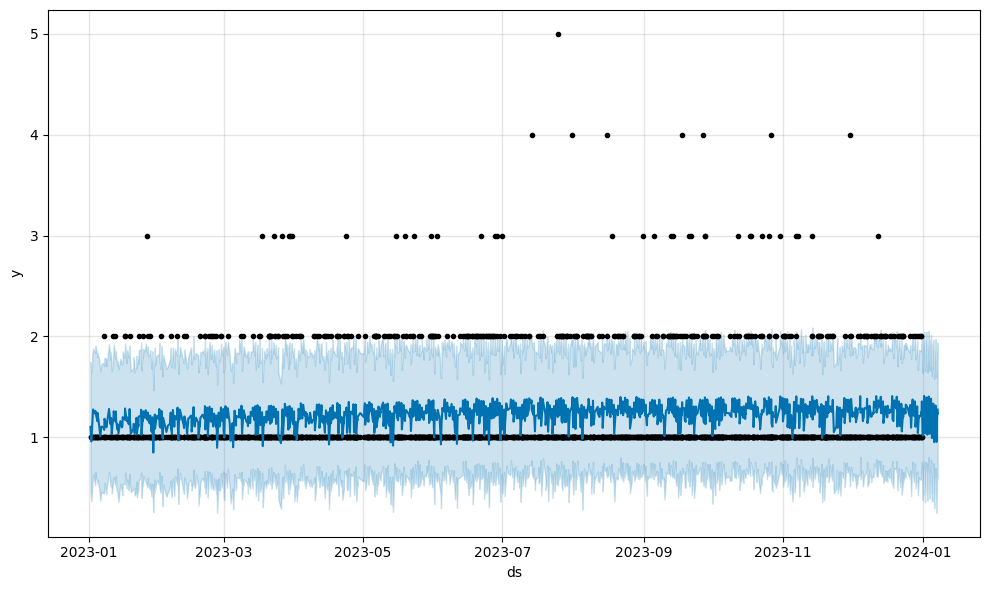

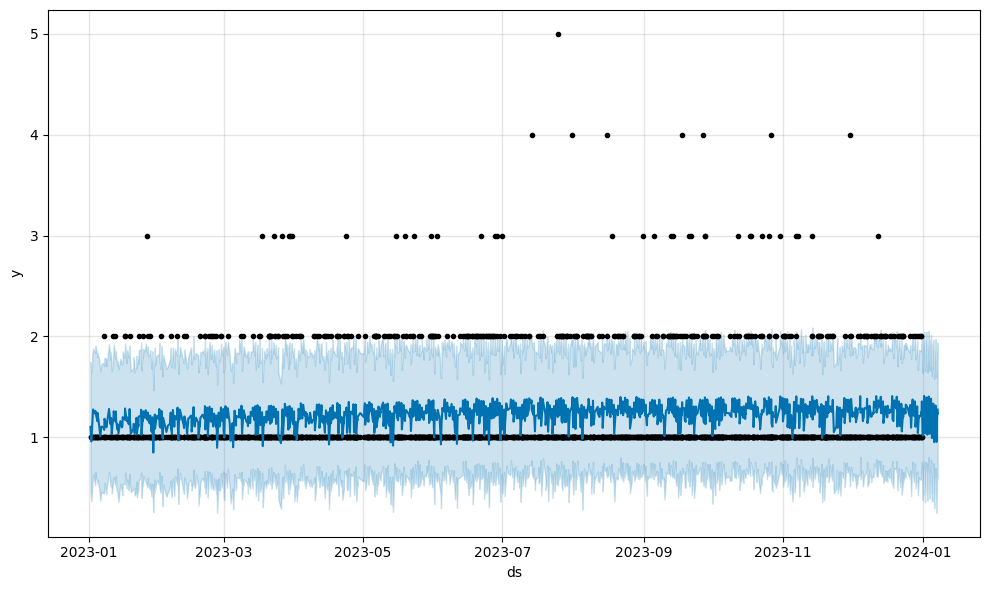

In [216]:
#Initialize and fit model
model = Prophet()
model.fit(hourly_demand)

#Create future dataframe: predict next 7 days hourly
future = model.make_future_dataframe(periods=24*7, freq='h')
forecast = model.predict(future)

#Plot forecast
model.plot(forecast)


Creating Demand Forecasting Model For All Stations: 

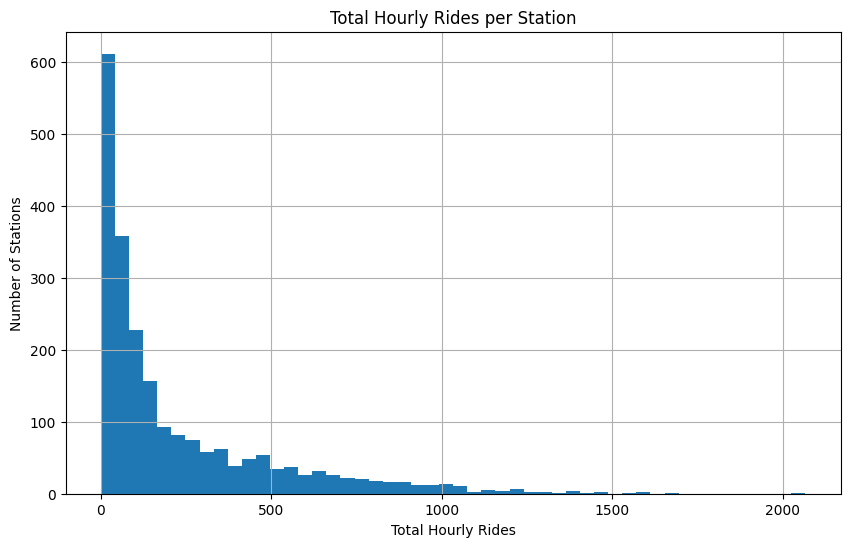

count    2196.000000
mean      227.111566
std       281.859384
min         1.000000
25%        37.000000
50%       104.000000
75%       315.000000
max      2067.000000
Name: rides, dtype: float64
5th Percentile of Total Hourly Rides per Station: 4.0


In [217]:
#First, we find a good cutoff point for the prophet model:
hourly_demand = CB2023_clean.groupby(["start_station_name", "hour"]).size().reset_index(name="rides")
station_demand_summary = hourly_demand.groupby("start_station_name")["rides"].sum().sort_values()

#Create a Histogram
station_demand_summary.plot(kind="hist", bins=50, figsize=(10,6), title="Total Hourly Rides per Station")
plt.xlabel("Total Hourly Rides")
plt.ylabel("Number of Stations")
plt.grid(True)
plt.show()

#Describe the stats
print(station_demand_summary.describe())
print("5th Percentile of Total Hourly Rides per Station:", station_demand_summary.quantile(0.05))



Cutoff point for forecasting will be the 5th percentile, 4.0.

In [ ]:
#Build hourly demand from  original data
hourly_demand = CB2023_clean.copy()
hourly_demand['ds'] = hourly_demand['started_at'].dt.floor('h')
hourly_demand = (
    hourly_demand
    .groupby(['start_station_name', 'ds'])
    .size()
    .reset_index(name='y')
)

#Set forecast horizon for a week = 7 days = 168 hours
HORIZON = 168

#Set cutoff point
dcutoff = 4

#Fit one Prophet model per station
forecasts = []
for station, station_data in hourly_demand.groupby('start_station_name'):
    if len(station_data) < dcutoff:
        continue
    m = Prophet()
    m.fit(station_data[['ds', 'y']])
    future = m.make_future_dataframe(periods=HORIZON, freq='h')
    fc = m.predict(future)[['ds', 'yhat']].rename(columns={'yhat': 'forecast'})
    fc['station'] = station
    forecasts.append(fc)

#Combine all forecasts
all_forecasts = pd.concat(forecasts, ignore_index=True)

#Export it into a .csv file
all_forecasts.to_csv('citibike2023_hourly_forecasts.csv', index=False)
print(all_forecasts.tail())

23:37:29 - cmdstanpy - INFO - Chain [1] start processing
23:37:29 - cmdstanpy - INFO - Chain [1] done processing
23:37:29 - cmdstanpy - INFO - Chain [1] start processing
23:37:29 - cmdstanpy - INFO - Chain [1] done processing
23:37:29 - cmdstanpy - INFO - Chain [1] start processing
23:37:29 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:31 - cmdstanpy - INFO - Chain [1] start processing
23:37:31 - cmdstanpy - INFO - Chain [1]

                        ds  forecast                station
823215 2023-12-15 13:00:00  0.915113  Yankee Ferry Terminal
823216 2023-12-15 14:00:00  0.954873  Yankee Ferry Terminal
823217 2023-12-15 15:00:00  0.980119  Yankee Ferry Terminal
823218 2023-12-15 16:00:00  0.961377  Yankee Ferry Terminal
823219 2023-12-15 17:00:00  0.910156  Yankee Ferry Terminal


Evaluate Accuracy of Predictions:

In [218]:
CB2023_clean["hour"] = CB2023_clean["started_at"].dt.floor("h")

#Aggregate actual demand
actual_hourly = (
    CB2023_clean.groupby(["start_station_name", "hour"])
    .size()
    .reset_index(name="actual")
    .rename(columns={"start_station_name": "station"})
)

#Prepare forecast dataframe
forecast_df.rename(columns={"ds": "hour", "forecast": "predicted"}, inplace=True)

#Merge actual and predicted values
merged = pd.merge(actual_hourly, forecast_df, on=["station", "hour"], how="inner")

#Compute per-station RMSE
rmse_df = (
    merged.groupby("station", group_keys=False)[["actual", "predicted"]]
    .apply(lambda x: pd.Series({"rmse": np.sqrt(mean_squared_error(x["actual"], x["predicted"]))}))
    .reset_index()
    .sort_values("rmse")
)

#Compute global RMSE across all predictions
global_rmse = np.sqrt(mean_squared_error(merged["actual"], merged["predicted"]))

#Output
print("Top stations by lowest RMSE:")
print(rmse_df.head())
print(f"\nTotal Global RMSE: {global_rmse:.4f}")


Top stations by lowest RMSE:
                        station  rmse
2102       Woodside Ave & 69 St   0.0
30       104 St & Northern Blvd   0.0
31              107 St & 32 Ave   0.0
1673  Rutland Rd & Brooklyn Ave   0.0
1674       Rutland Rd & E 45 St   0.0

Total Global RMSE: 0.2603


Visualization of Model Accuracy:

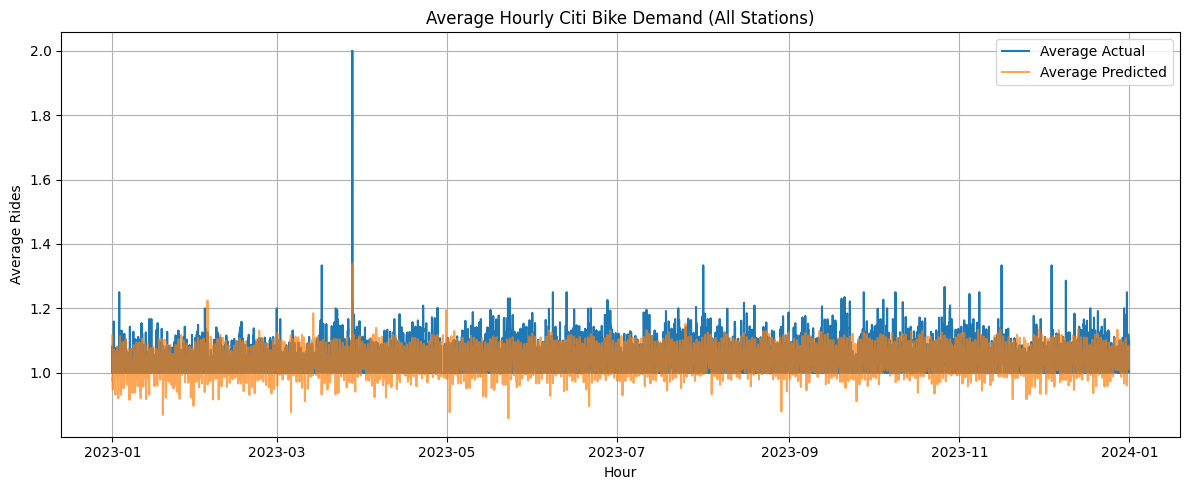

In [219]:
#Group by hour across all stations
avg_plot_data = (
    merged
    .groupby("hour")[["actual", "predicted"]]
    .mean()
    .reset_index()
    .sort_values("hour")
)

plt.figure(figsize=(12, 5))
plt.plot(avg_plot_data["hour"], avg_plot_data["actual"], label="Average Actual")
plt.plot(avg_plot_data["hour"], avg_plot_data["predicted"], label="Average Predicted", alpha=0.7)
plt.title("Average Hourly Citi Bike Demand (All Stations)")
plt.xlabel("Hour")
plt.ylabel("Average Rides")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Pickle Forecasting Model (For Flask API Creation)

In [205]:
#Recreating the entire model here because I don't want to have to recreate the .csv again:
import pickle
hourly_demand = CB2023_clean.copy()
hourly_demand['ds'] = hourly_demand['started_at'].dt.floor('h')
hourly_demand = (
    hourly_demand
    .groupby(['start_station_name', 'ds'])
    .size()
    .reset_index(name='y')
)


HORIZON = 168
dcutoff = 4

station_models = {}
for station, station_data in hourly_demand.groupby('start_station_name'):
    if len(station_data) < dcutoff:
        continue
    m = Prophet()
    m.fit(station_data[['ds', 'y']])
    station_models[station] = m  

with open("all_station_prophet_models.pkl", "wb") as f:
    pickle.dump(station_models, f)

print("All Prophet models pickled as 'all_station_prophet_models.pkl'")

03:23:24 - cmdstanpy - INFO - Chain [1] start processing
03:23:24 - cmdstanpy - INFO - Chain [1] done processing
03:23:24 - cmdstanpy - INFO - Chain [1] start processing
03:23:24 - cmdstanpy - INFO - Chain [1] done processing
03:23:24 - cmdstanpy - INFO - Chain [1] start processing
03:23:24 - cmdstanpy - INFO - Chain [1] done processing
03:23:24 - cmdstanpy - INFO - Chain [1] start processing
03:23:24 - cmdstanpy - INFO - Chain [1] done processing
03:23:24 - cmdstanpy - INFO - Chain [1] start processing
03:23:25 - cmdstanpy - INFO - Chain [1] done processing
03:23:25 - cmdstanpy - INFO - Chain [1] start processing
03:23:25 - cmdstanpy - INFO - Chain [1] done processing
03:23:25 - cmdstanpy - INFO - Chain [1] start processing
03:23:25 - cmdstanpy - INFO - Chain [1] done processing
03:23:25 - cmdstanpy - INFO - Chain [1] start processing
03:23:25 - cmdstanpy - INFO - Chain [1] done processing
03:23:25 - cmdstanpy - INFO - Chain [1] start processing
03:23:25 - cmdstanpy - INFO - Chain [1]

All Prophet models pickled as 'all_station_prophet_models.pkl'
